# SARIMA Modeling

## Kevin Sheppard
### Advanced Financial Econometrics: Forecasting

### Background

Material available on [my site](https://www.kevinsheppard.com/teaching/mfe/advanced-financial-econometrics-forecasting/).

More detail in [pre-recorded lectures](https://www.youtube.com/playlist?list=PLVR_rJLcetzmES8tqjgqlQw1Vx2IKMVot).

### Viewing as a Presentation

This notebook has been written with RISE in mind. To view it as a presentation, install RISE using pip install RISE and then press ALT + R to enter slides model.


### Updating statsmodels

Some of the code in this notebook requires a recent version statsmodels (as of May 2020). If you already have statsmodels 0.12.0 or later, you can ignore this step.

You can install the development version of statsmodels using the command

```
pip install statsmodels --upgrade --pre --find-links https://7933911d6844c6c53a7d-47bd50c35cd79bd838daf386af554a83.ssl.cf2.rackcdn.com/ 
```

This is a repository where pre-release versions are stored.

# Imports and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")
# These values are optimized for full-screen on a high-resolution monitor
plt.rc("figure", figsize=(40,16))
plt.rc("font", size=28)
plt.rc("lines", linewidth=4)

# Load some data

We will use the 432-observation M4 data to explore ES.

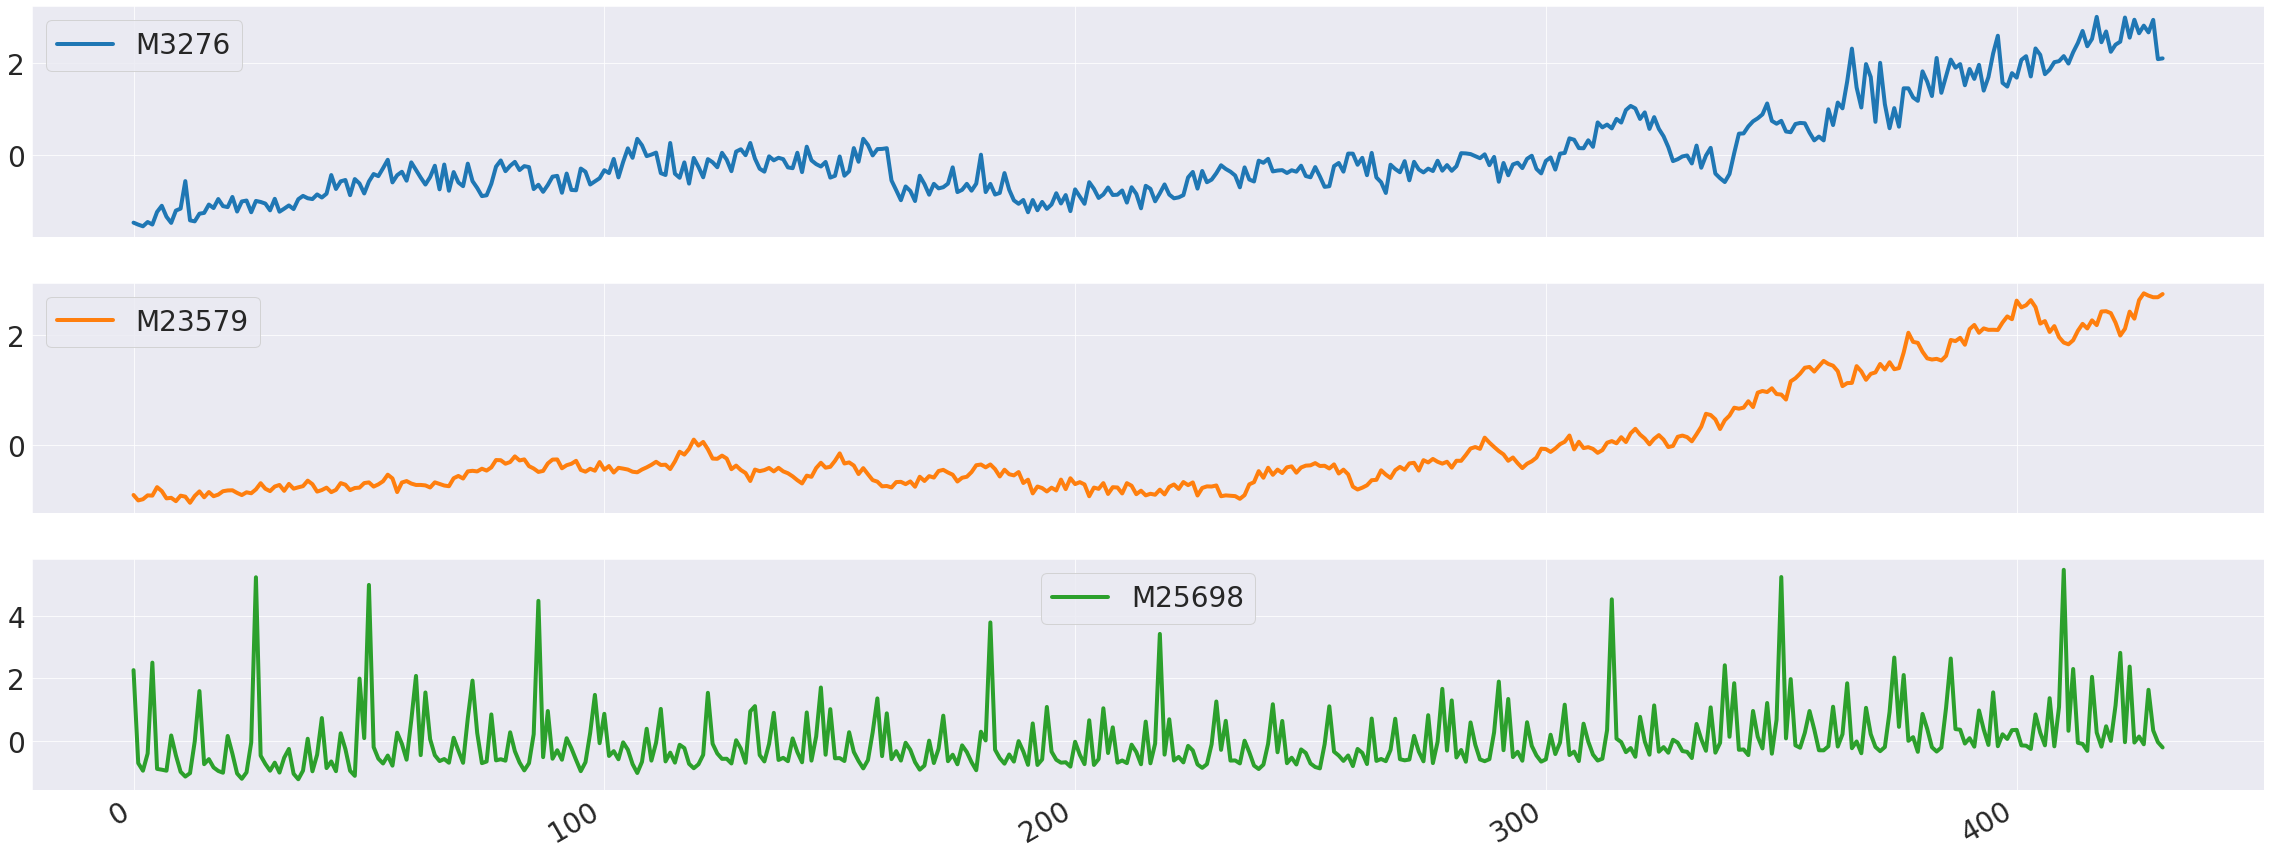

In [2]:
df: pd.DataFrame = pd.read_hdf("./monthly-data.h5", f"nobs_432")
data = df[["M3276","M23579","M25698"]]
data.index = np.arange(data.shape[0])
std_data = (data - data.mean()) / data.std()
plts = std_data.plot(subplots=True)

# Non-seasonal modeling

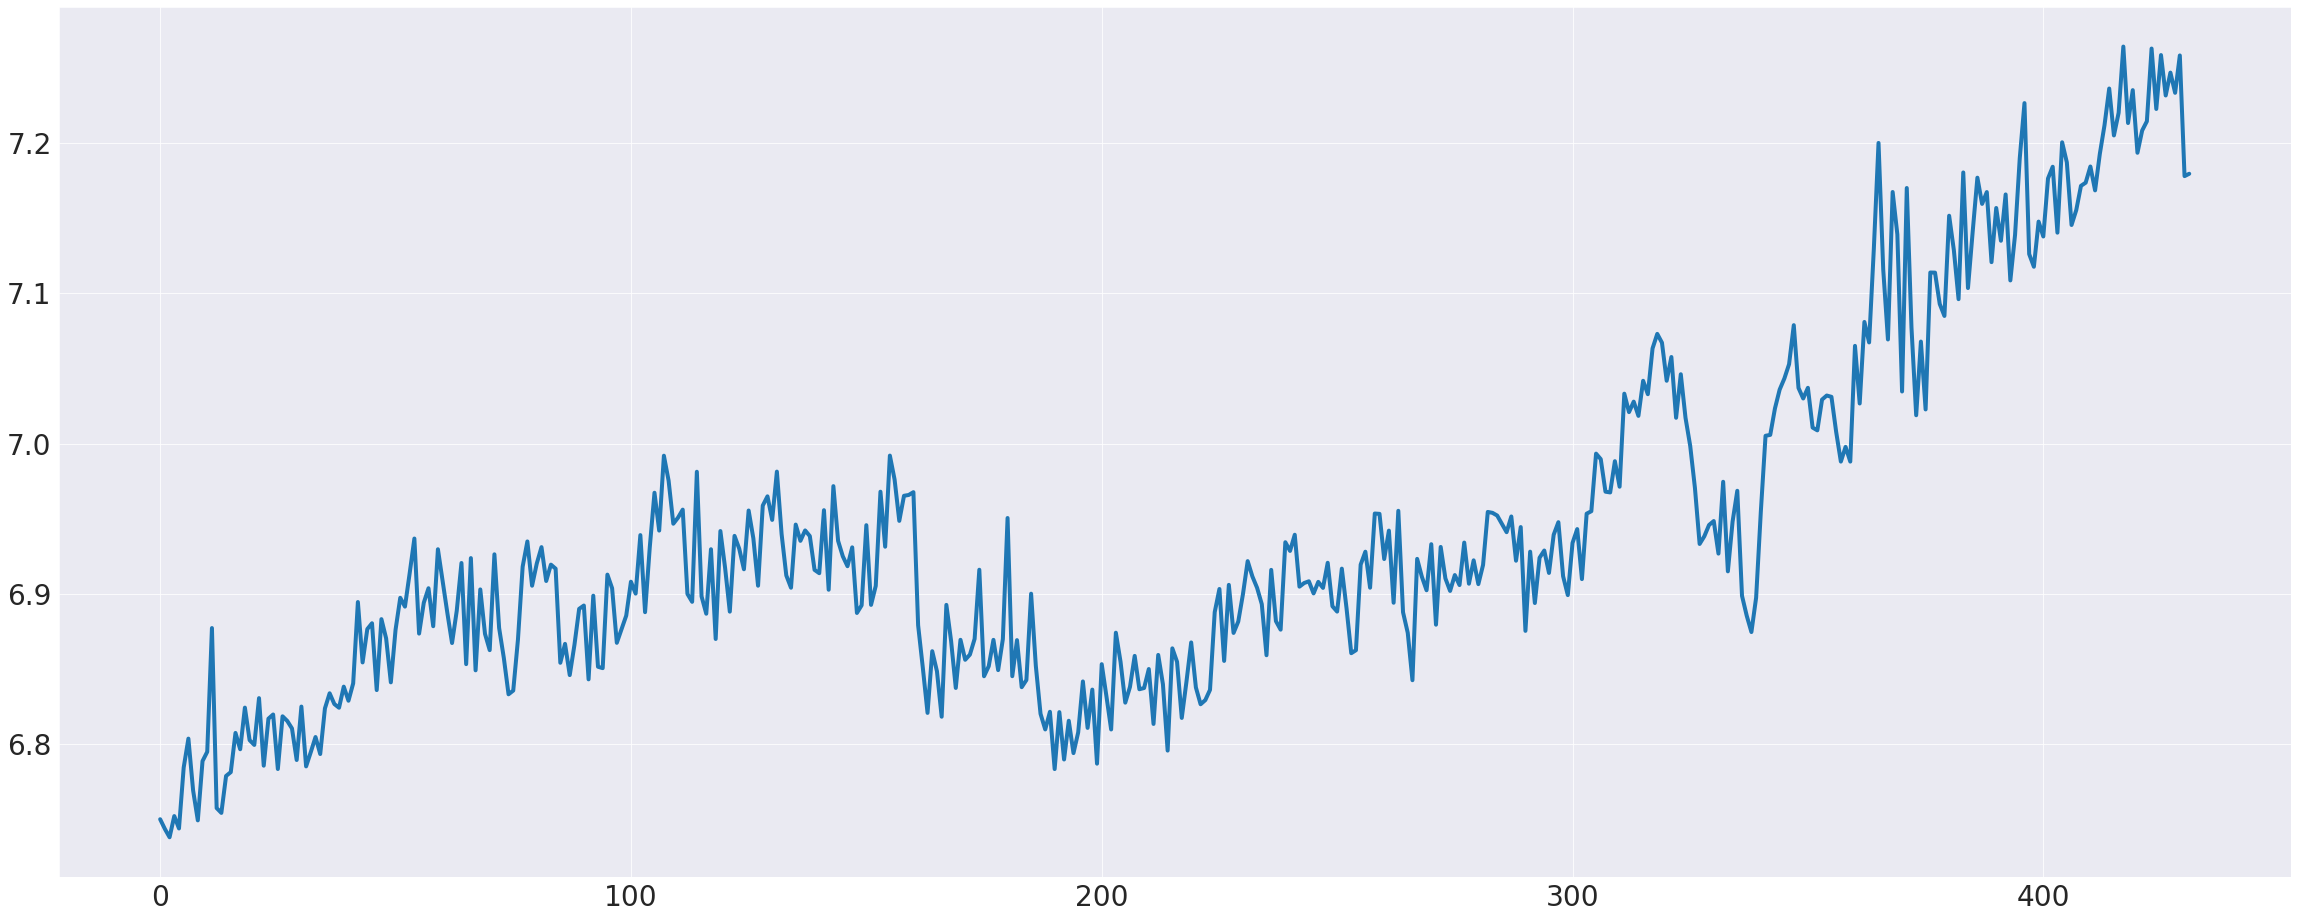

In [3]:
y = np.log(data["M3276"])
_ = y.plot()

# Time Trend and AR(1)

In [4]:
res = SARIMAX(y, order=(1,0,0), trend="ct").fit(maxiter=250)
res.summary()

/home/kevin/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 828.258
Date:                Fri, 08 May 2020   AIC                          -1648.515
Time:                        00:39:12   BIC                          -1632.242
Sample:                             0   HQIC                         -1642.091
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8916      0.166      5.376      0.000       0.567       1.217
drift       9.836e-05    2.3e-05      4.271      0.000    5.32e-05       0.000
ar.L1          0.8686      0.024     35.550      0.000       0.821       0.917
sigma2         0.0013   8.38e-05     15.075      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      468.41   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               1.31   Skew:                             0.14
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
y = np.log(data["M3276"])
res = SARIMAX(y, order=(1,0,1), trend="ct").fit(maxiter=250)
res.summary()

/home/kevin/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  M3276   No. Observations:                  432
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 871.818
Date:                Fri, 08 May 2020   AIC                          -1733.637
Time:                        00:39:13   BIC                          -1713.295
Sample:                             0   HQIC                         -1725.606
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3852      0.088      4.385      0.000       0.213       0.557
drift       4.312e-05   1.11e-05      3.901      0.000    2.15e-05    6.48e-05
ar.L1          0.9433      0.013     72.878      0.000       0.918       0.969
ma.L1         -0.5243      0.040    -13.111      0.000      -0.603      -0.446
sigma2         0.0010    6.6e-05     15.096      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                      242.60   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               1.49   Skew:                             0.14
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

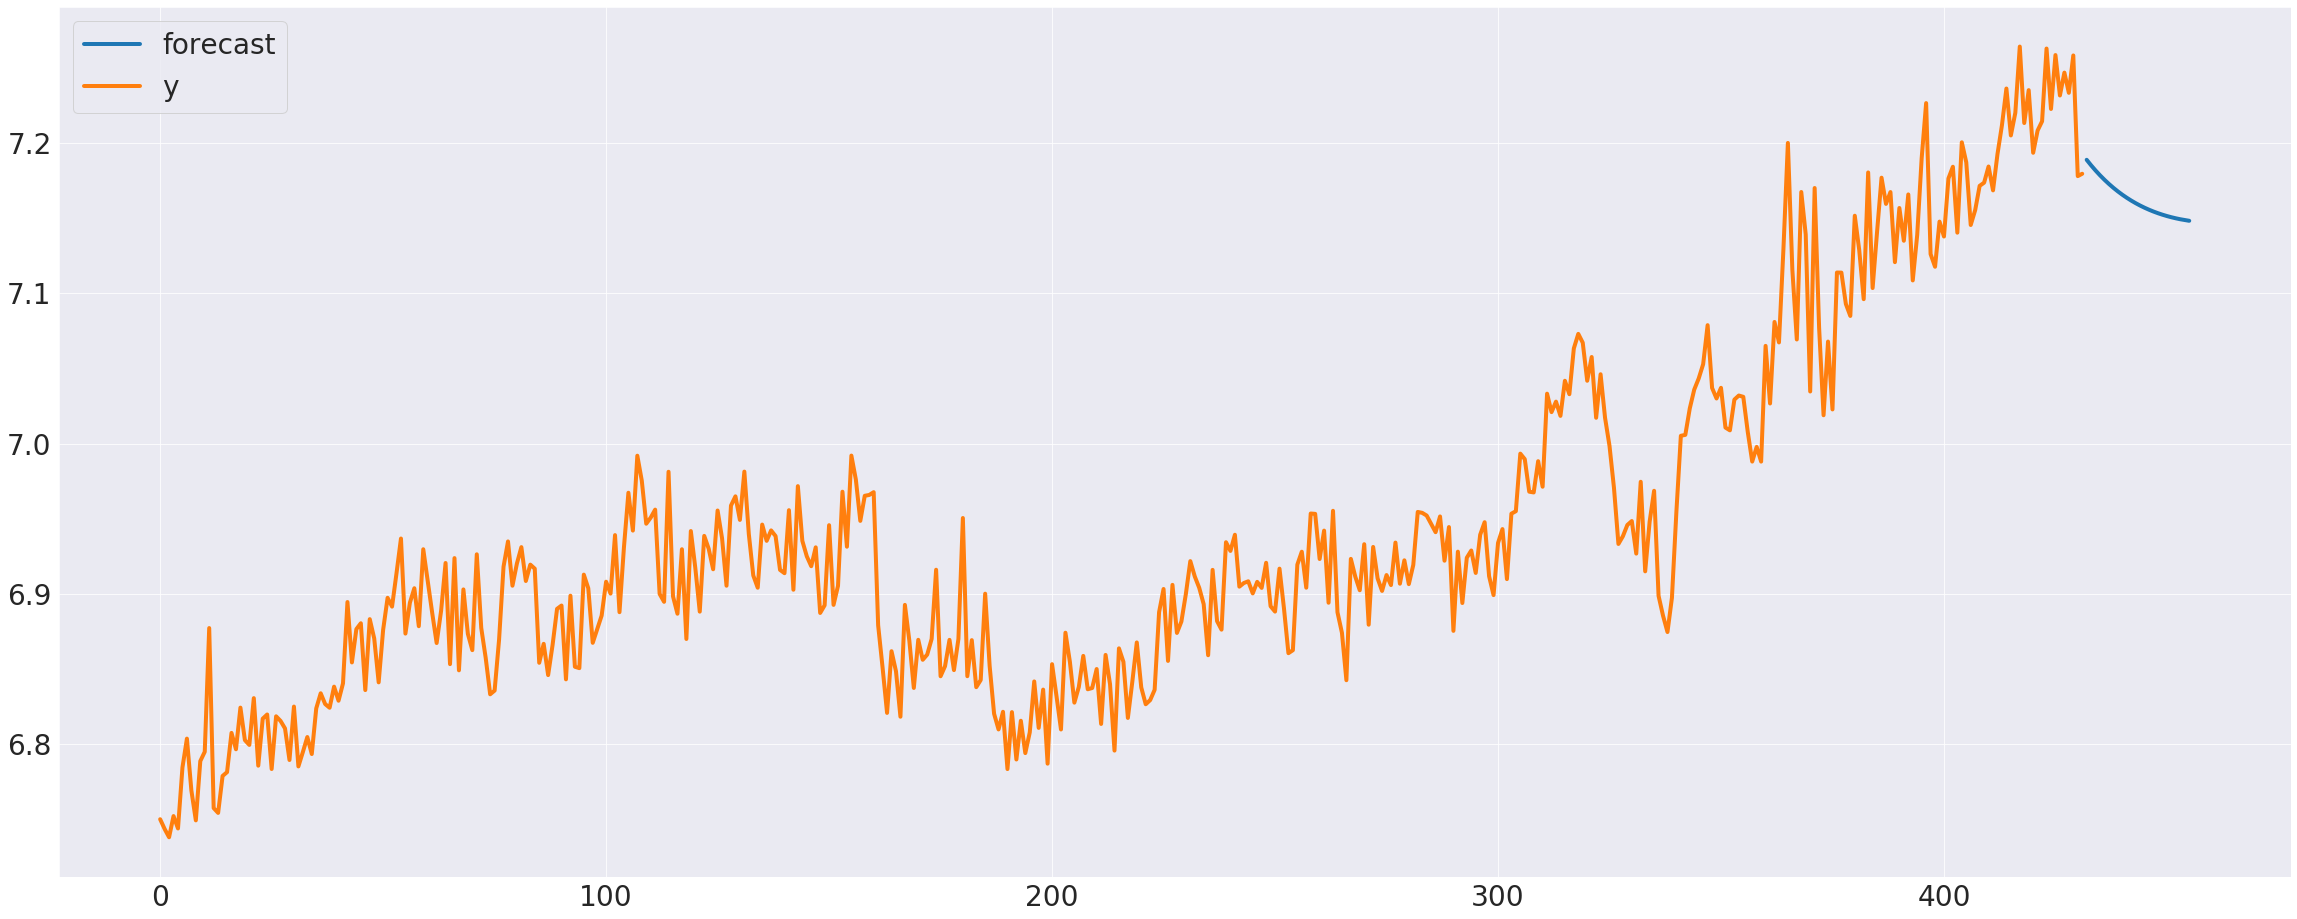

In [6]:
def plot_forecast(y, forecast, tail=None):
    df = pd.DataFrame({"forecast":pd.Series(list(np.nan * y) + list(forecast)),
                   "y": y})
    if tail is not None:
        df = df.tail(tail)
    df.plot()
plot_forecast(y, res.forecast(24))

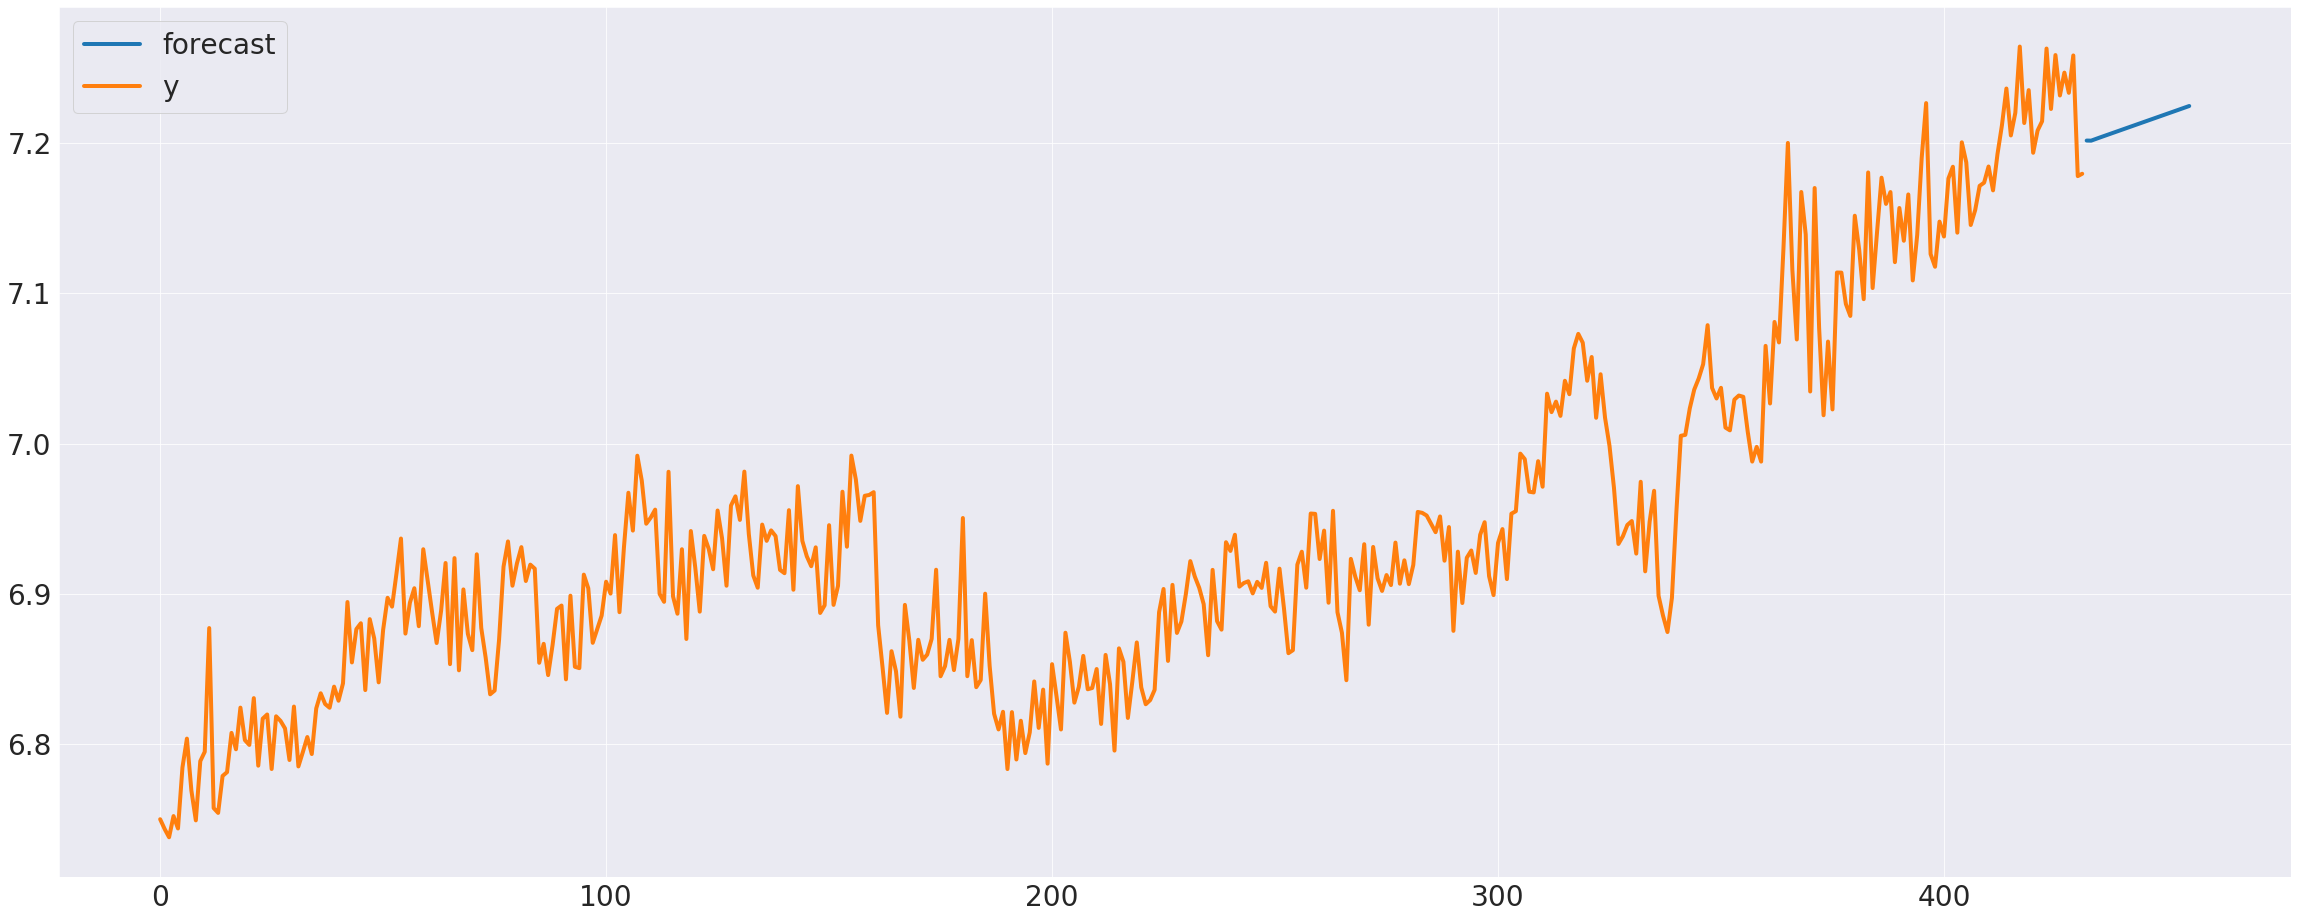

In [7]:
res = SARIMAX(y, order=(1, 1, 1), trend="c").fit(maxiter=250)
res.summary()
plot_forecast(y, res.forecast(24))

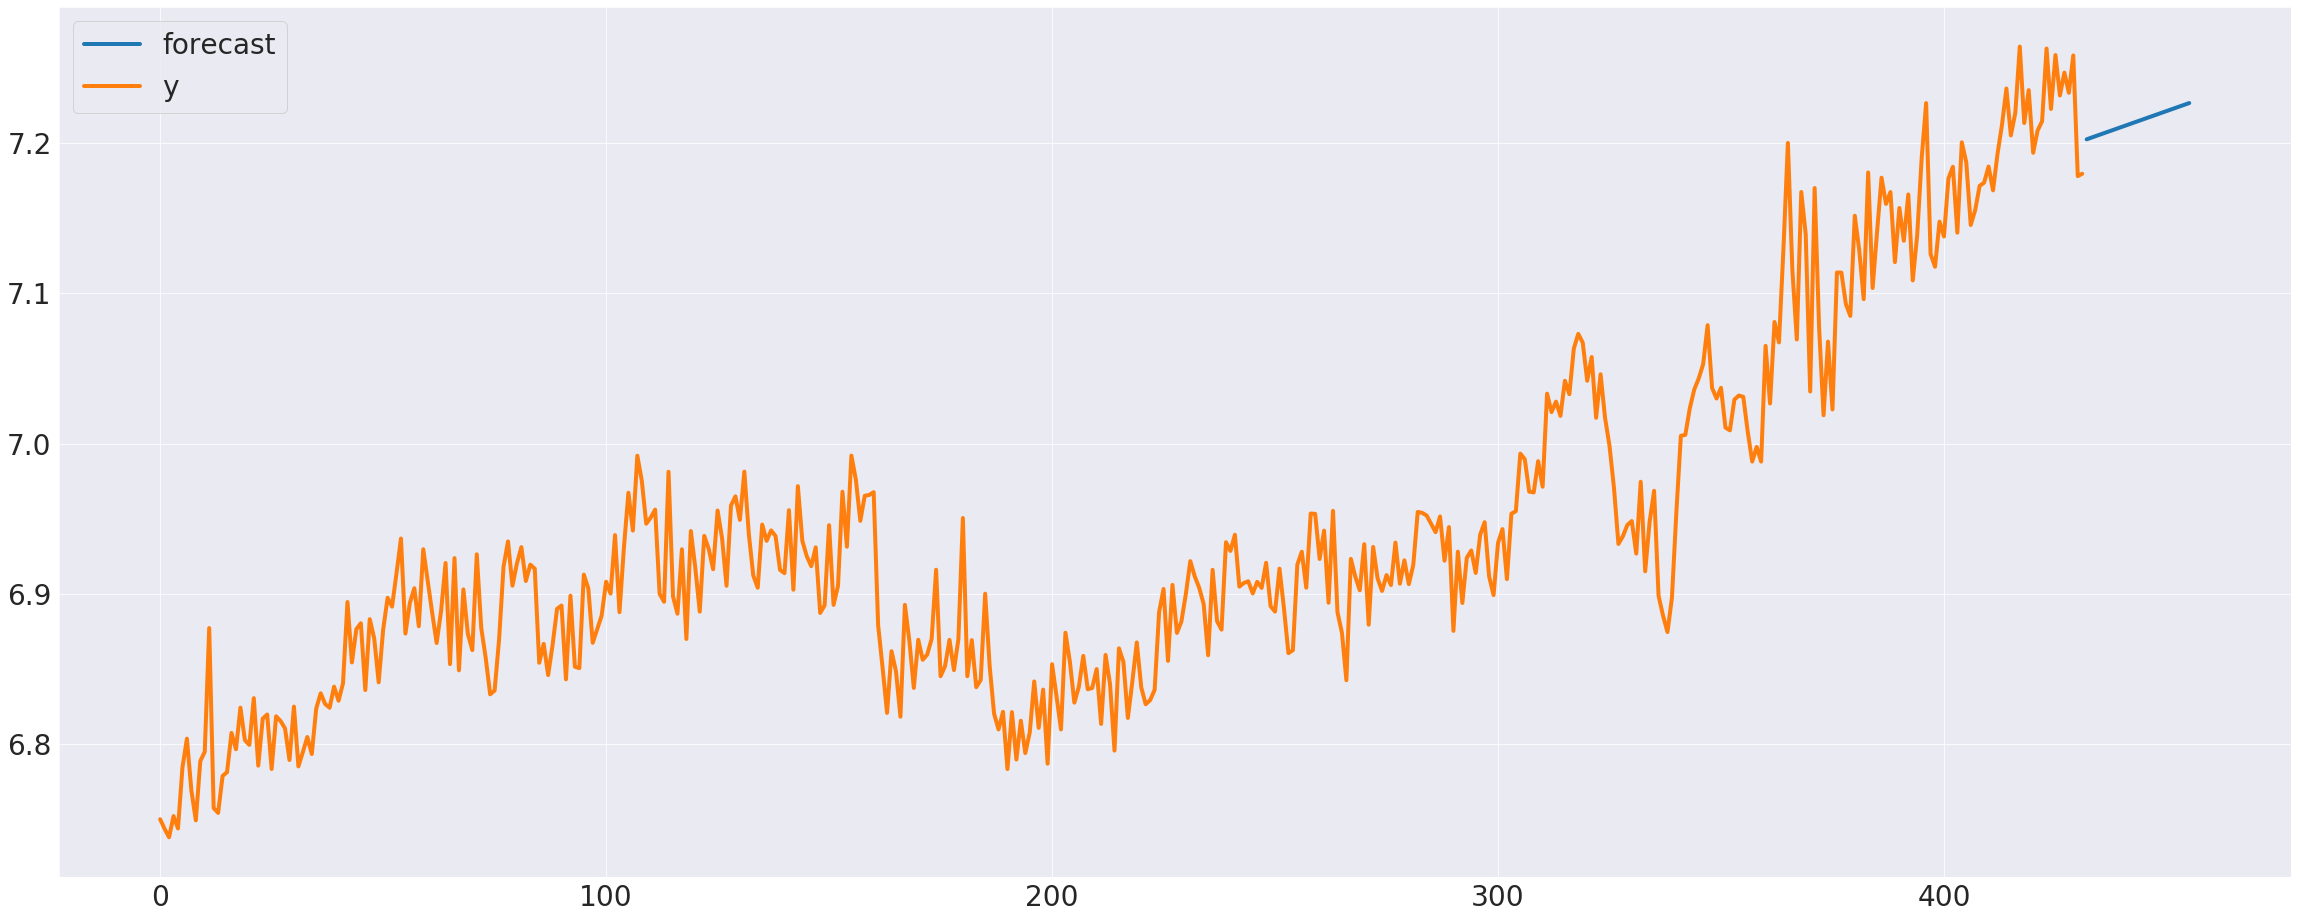

In [8]:
res = SARIMAX(y, order=(0, 1, 1), trend="c").fit(maxiter=250)
res.summary()
plot_forecast(y, res.forecast(24))

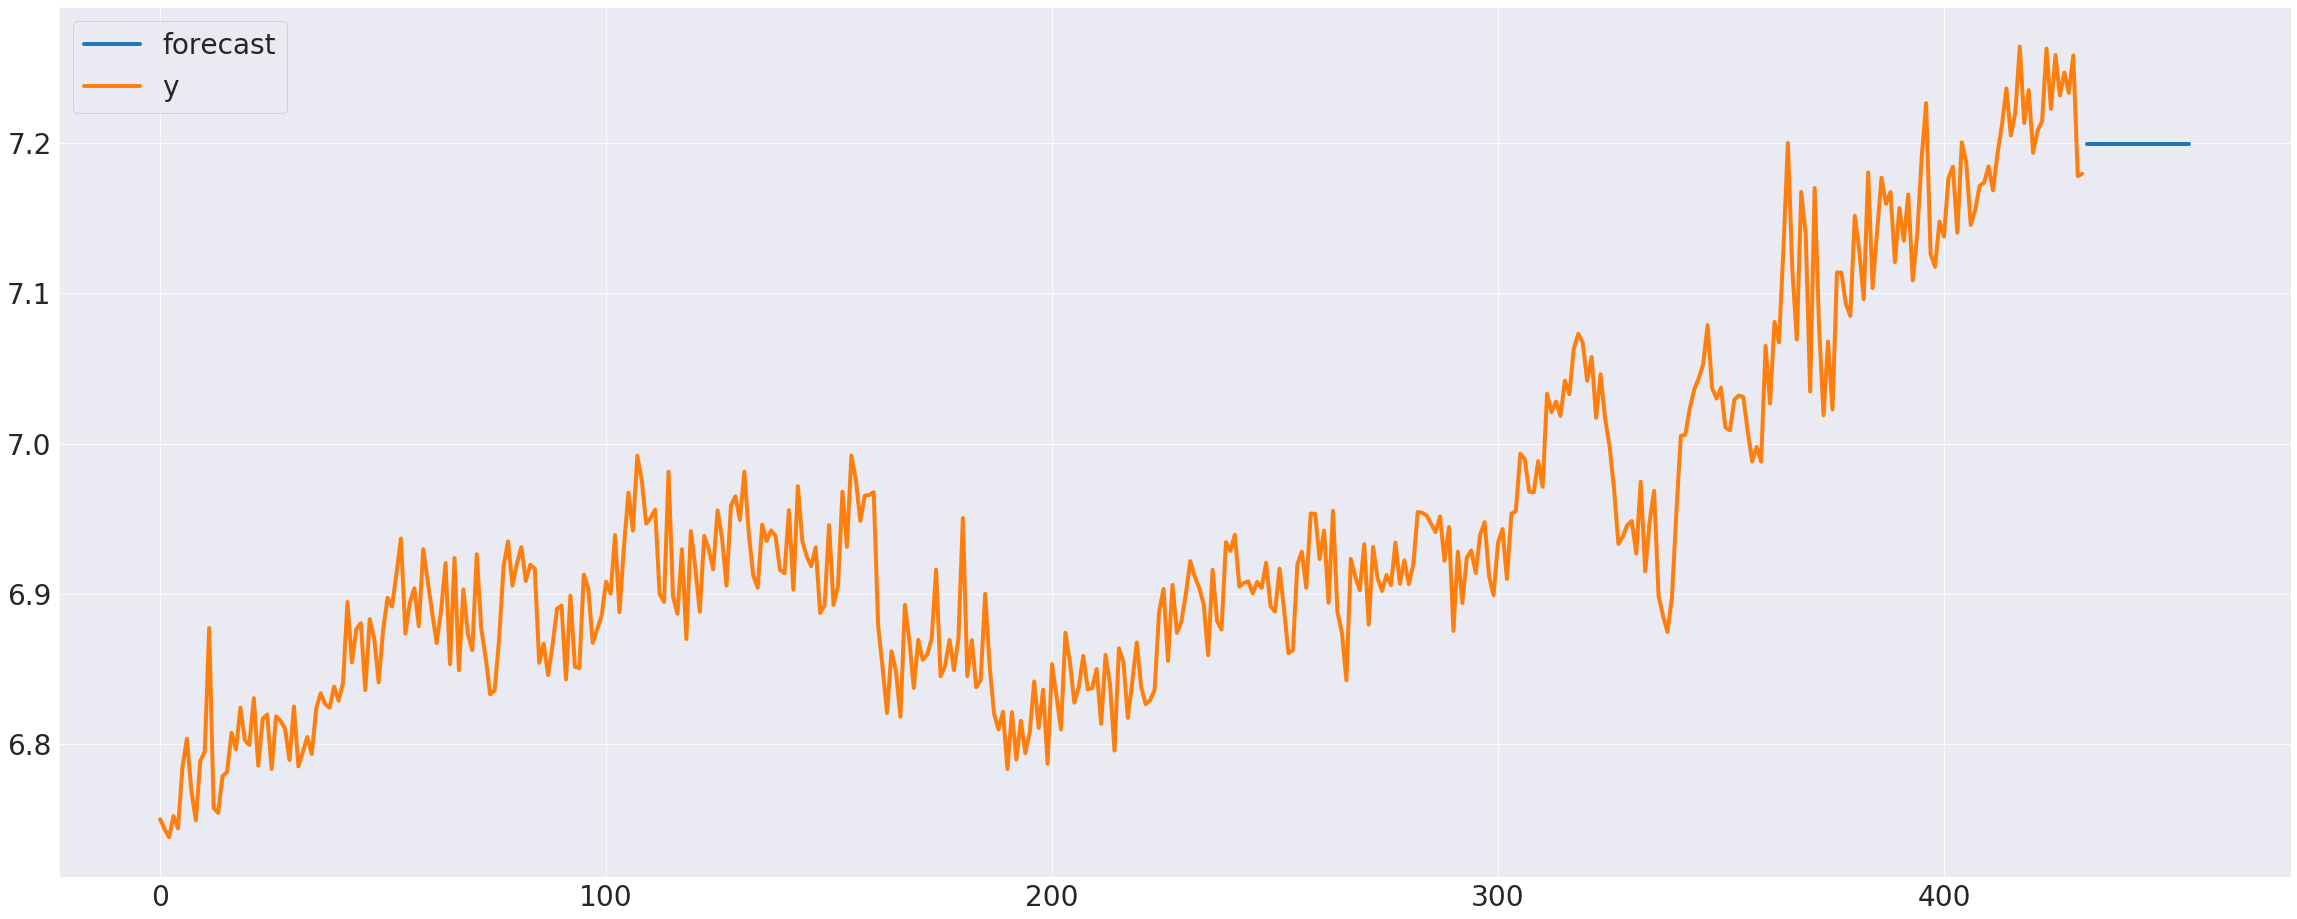

In [9]:
res = SARIMAX(y, order=(0, 1, 1), trend="n").fit(maxiter=250)
res.summary()
plot_forecast(y, res.forecast(24))

# Seasonal

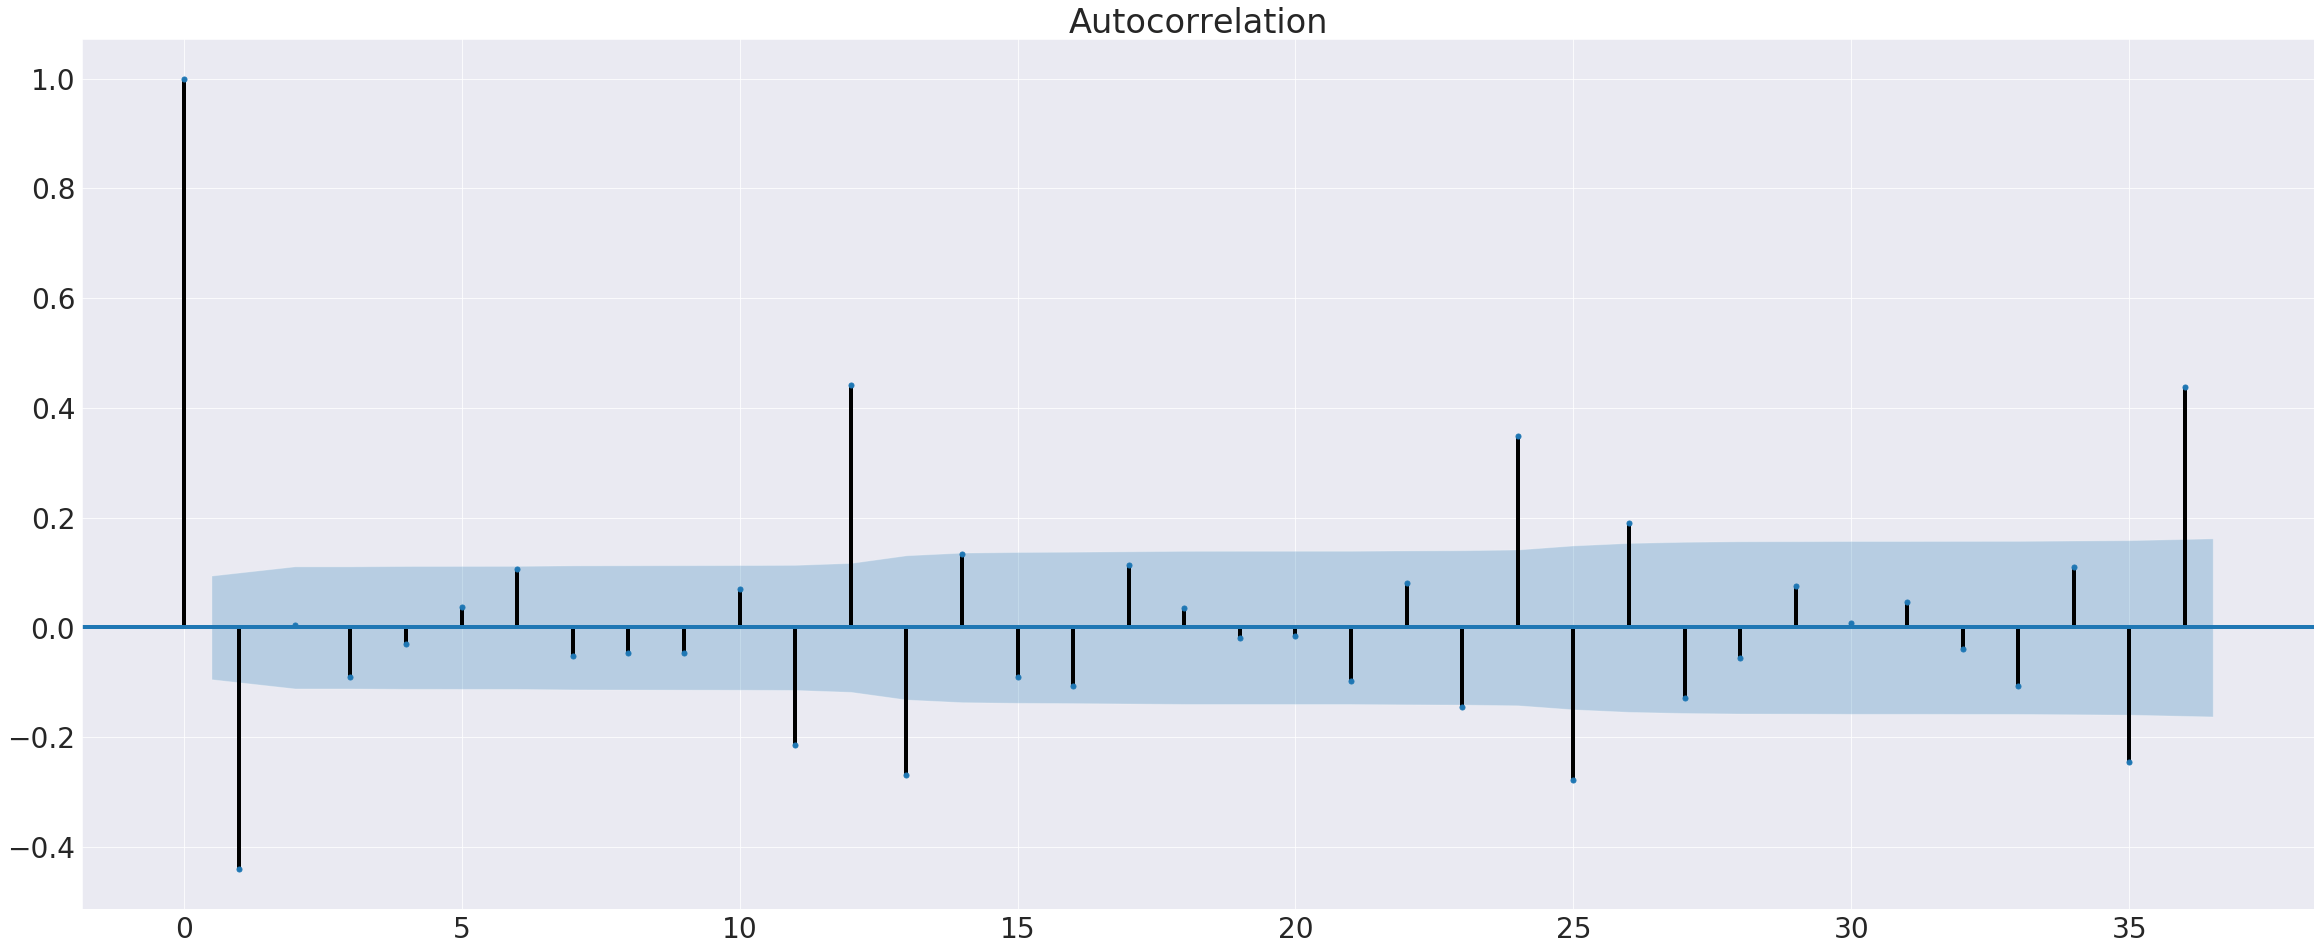

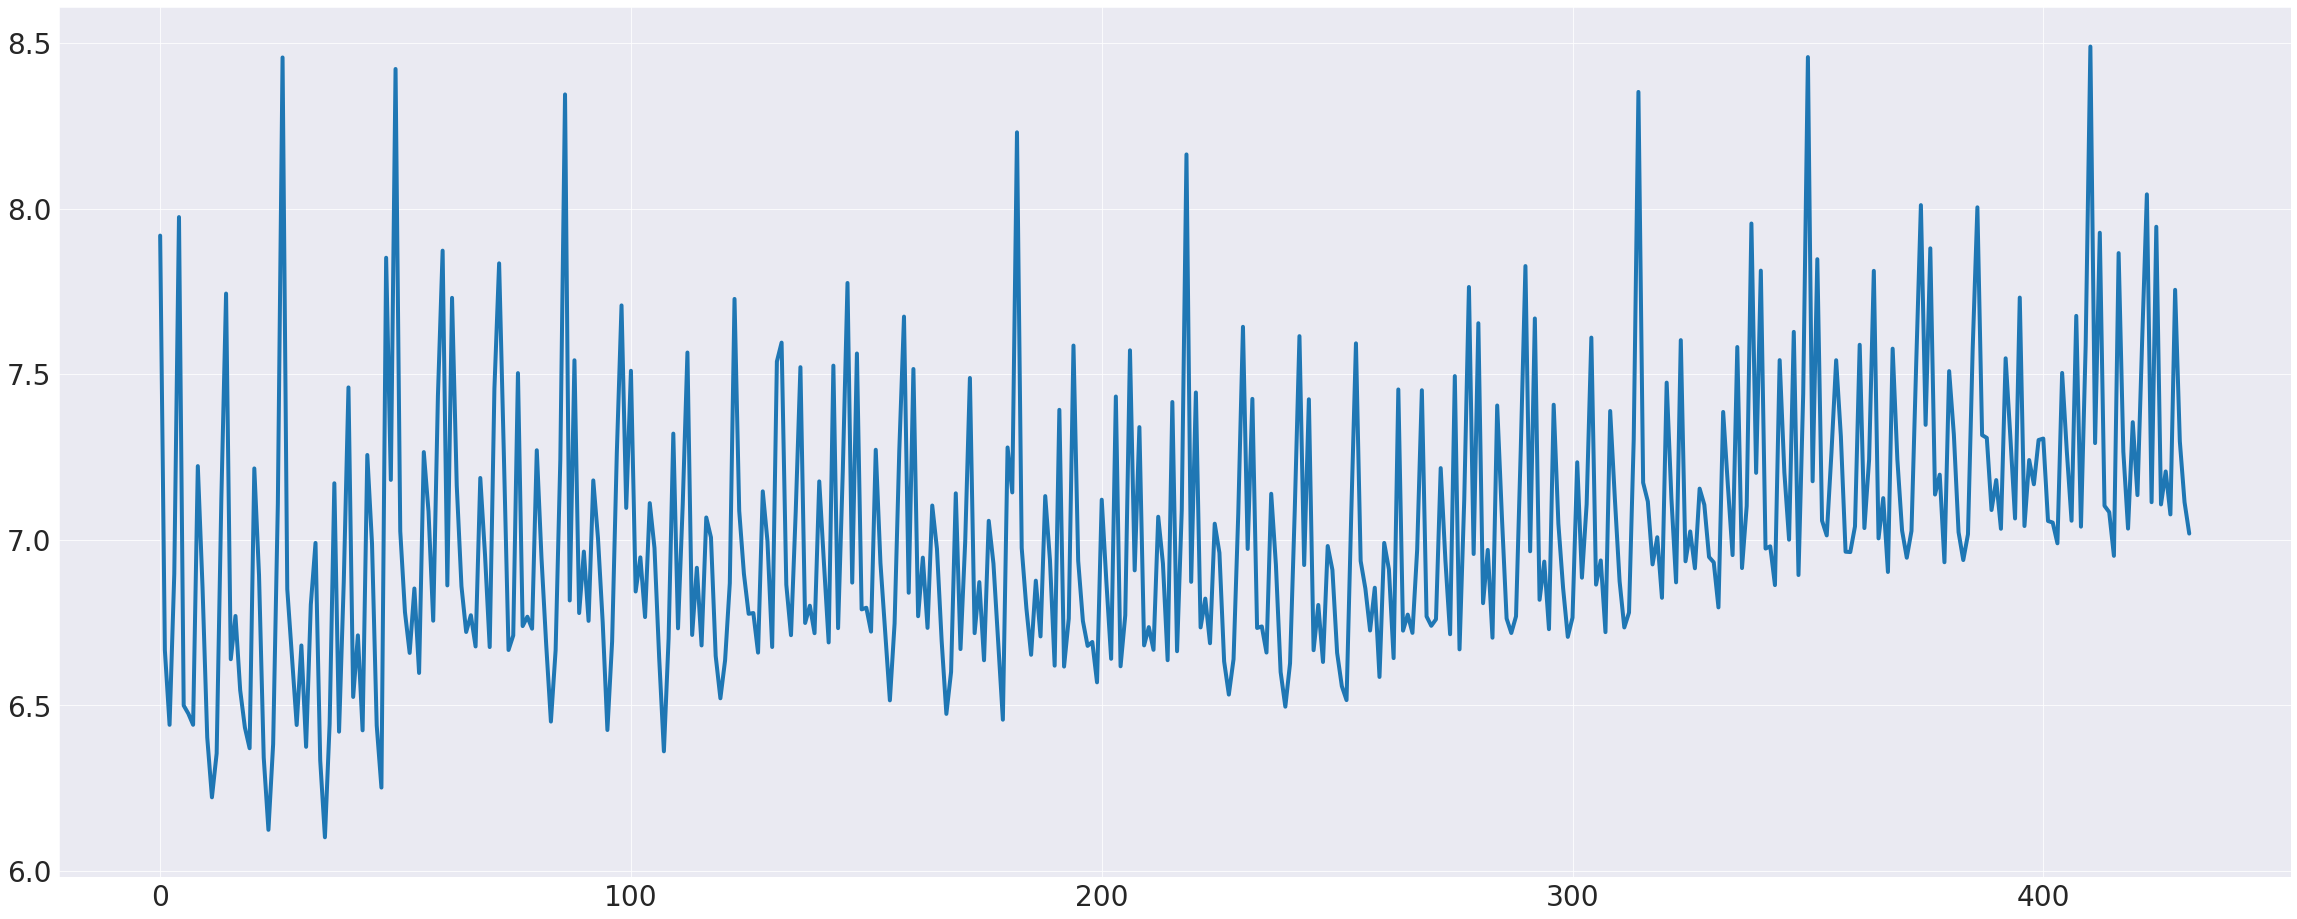

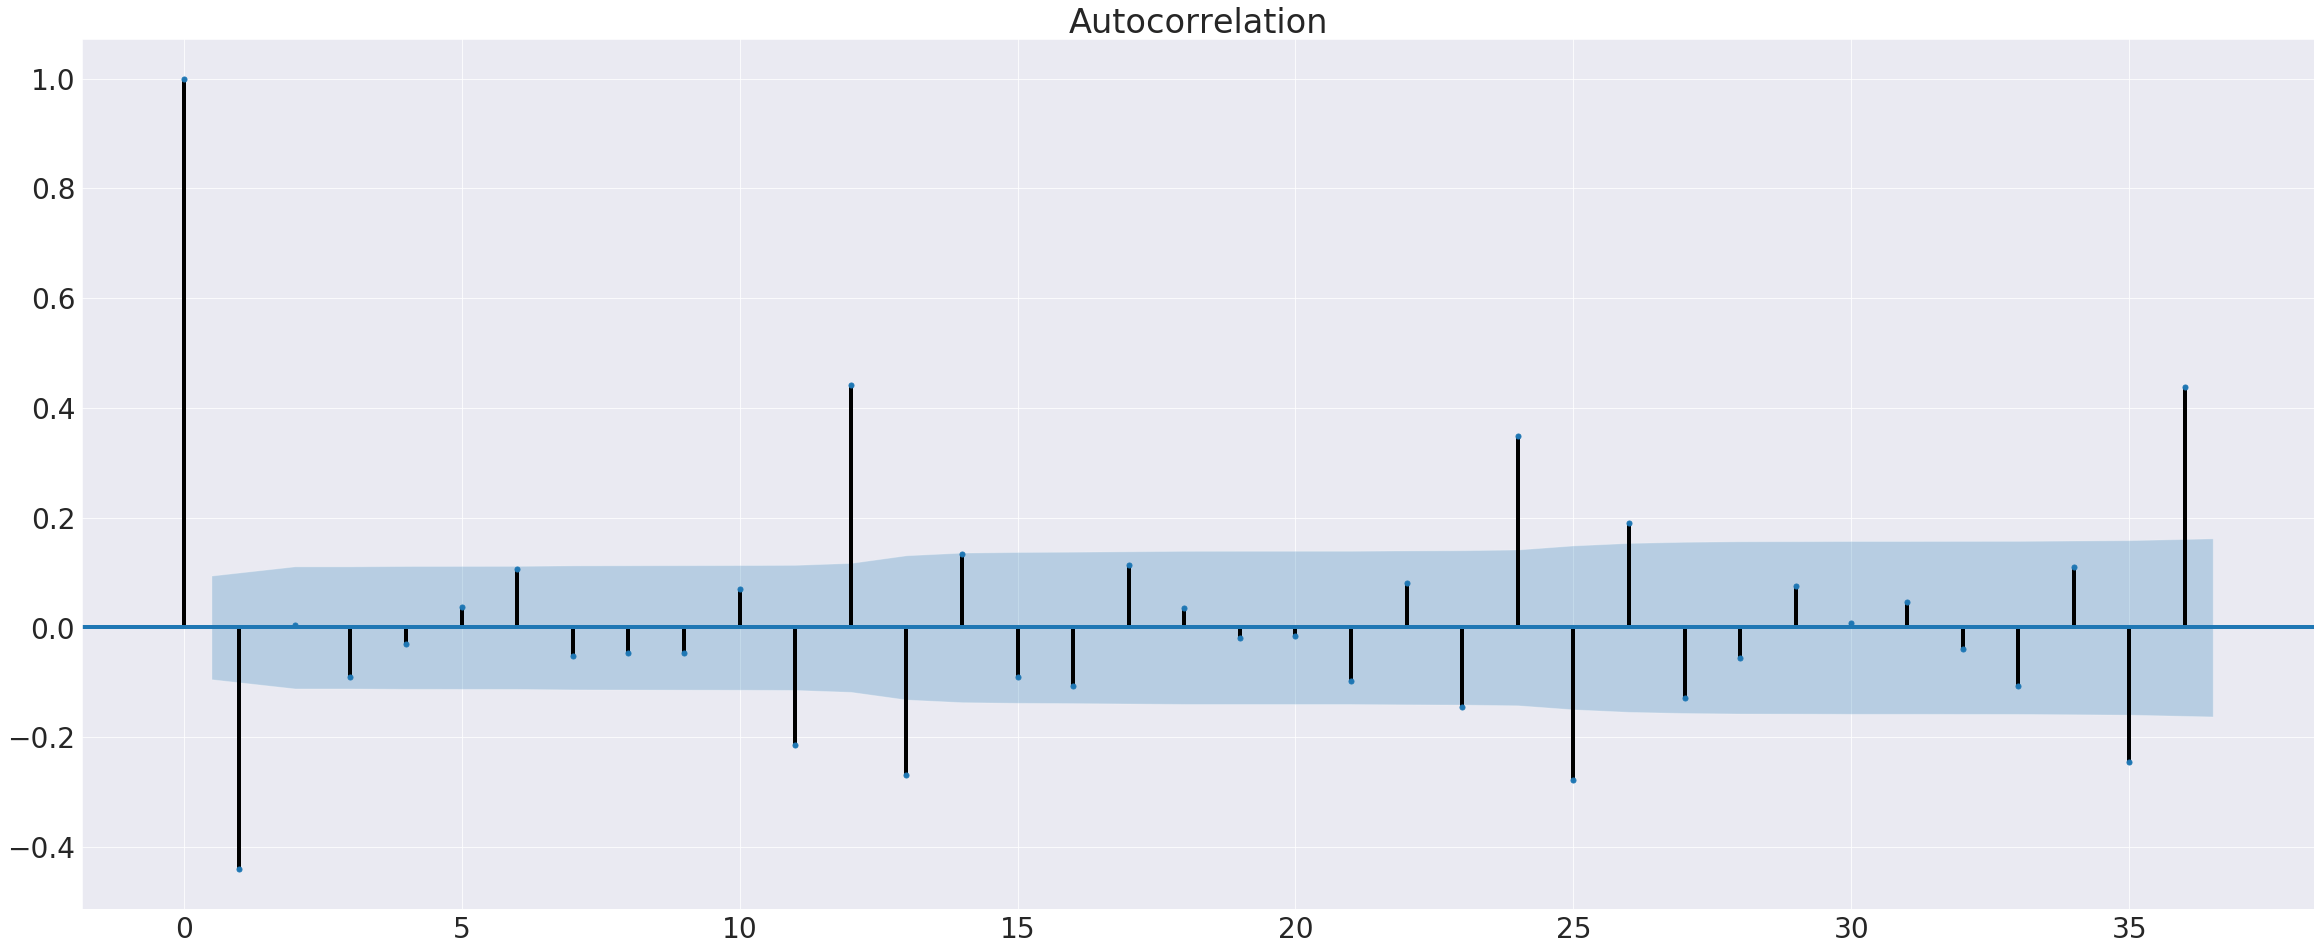

In [10]:
y = np.log(data["M25698"])
y.plot()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
plot_acf(y.diff().dropna(), lags=36)

In [11]:
seasonals = np.arange(y.shape[0] + 24)
seasonals = seasonals % 12
seasonals

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9

In [12]:
from pandas import get_dummies
dummies = get_dummies(pd.Series(seasonals, dtype="category"), drop_first=True)
dummies.columns = [f"s{i}" for i in range(2, 13)]
dummies.head(14)

,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0


In [13]:
res = SARIMAX(y, exog=dummies.iloc[:y.shape[0]], order=(1, 0 , 0), trend="c").fit(maxiter=250)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 M25698   No. Observations:                  432
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -107.374
Date:                Fri, 08 May 2020   AIC                            242.749
Time:                        00:39:23   BIC                            299.707
Sample:                             0   HQIC                           265.236
                                - 432                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7941      0.303     15.817      0.000       4.200       5.388
s2             0.2554      0.070      3.637      0.000       0.118       0.393
s3             0.6801      0.056     12.059      0.000       0.570       0.791
s4             0.1154      0.082      1.399      0.162      -0.046       0.277
s5             0.4814      0.068      7.050      0.000       0.348       0.615
s6            -0.1100      0.115     -0.960      0.337      -0.335       0.115
s7            -0.0333      0.137     -0.244      0.807      -0.301       0.235
s8            -0.1787      0.126     -1.424      0.155      -0.425       0.067
s9             0.3660      0.102      3.581      0.000       0.166       0.566
s10            0.1349      0.176      0.766      0.444      -0.210       0.480
s11           -0.1602      0.112     -1.434      0.152      -0.379       0.059
s12            0.0493      0.056      0.879      0.379      -0.061       0.159
ar.L1          0.3062      0.044      7.031      0.000       0.221       0.392
sigma2         0.0962      0.005     17.539      0.000       0.085       0.107
===================================================================================
Ljung-Box (Q):                      239.20   Jarque-Bera (JB):                47.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
forecast = res.forecast(24, exog=dummies.iloc[y.shape[0]:])
forecast

432    6.928331
433    7.171126
434    7.592015
435    7.026127
436    7.391754
437    6.800258
438    6.876891
439    6.731476
440    7.276213
441    7.045103
442    6.749934
443    6.959506
444    6.910183
445    7.165568
446    7.590313
447    7.025605
448    7.391594
449    6.800209
450    6.876876
451    6.731471
452    7.276212
453    7.045103
454    6.749934
455    6.959505
dtype: float64

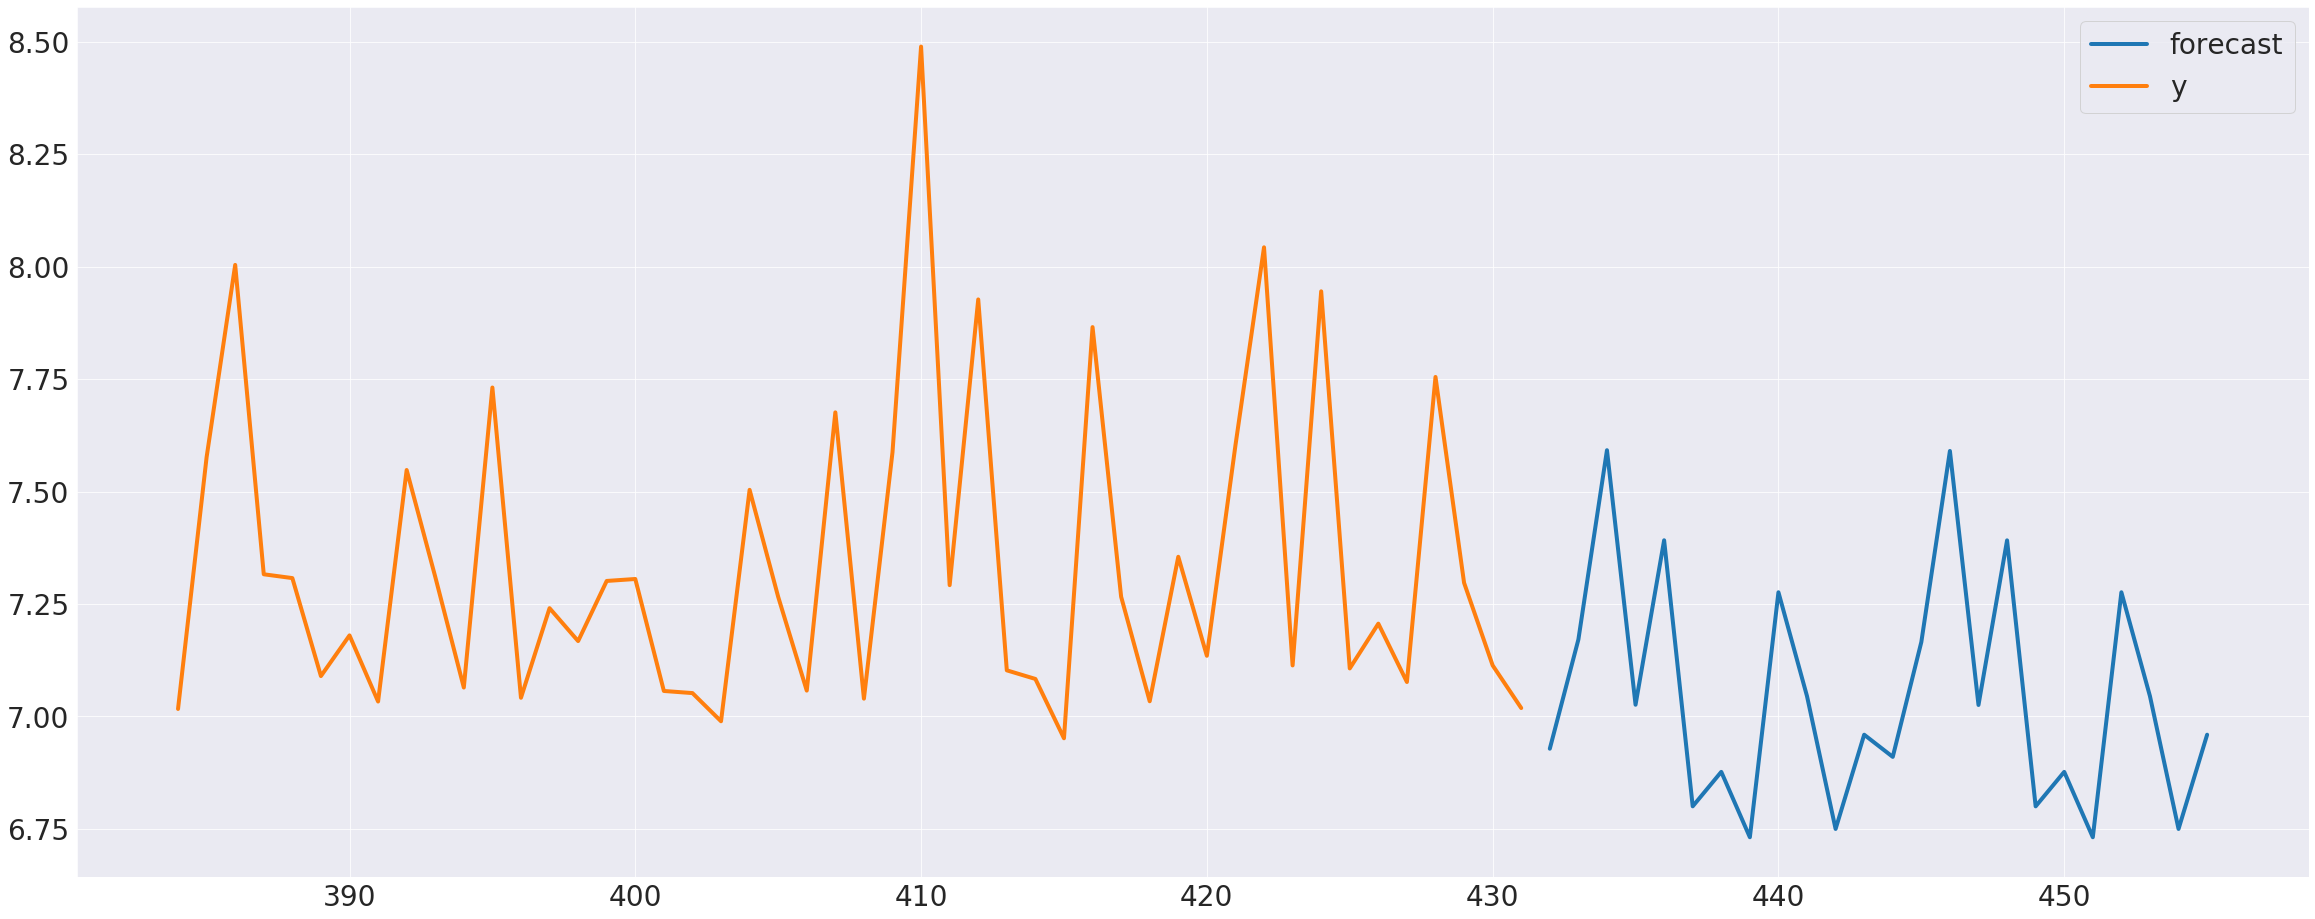

In [15]:
plot_forecast(y, forecast, 72)

In [16]:
res = SARIMAX(y,order=(0,0,0), seasonal_order=(0, 1,0, 12), trend="c").fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                   M25698   No. Observations:                  432
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -210.775
Date:                  Fri, 08 May 2020   AIC                            425.550
Time:                          00:39:24   BIC                            433.630
Sample:                               0   HQIC                           428.743
                                  - 432                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0152      0.020      0.780      0.436      -0.023       0.054
sigma2         0.1597      0.005     30.444      0.000       0.149       0.170
===================================================================================
Ljung-Box (Q):                      152.93   Jarque-Bera (JB):               822.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
forecast = res.forecast(24)
forecast

432    7.150139
433    7.617986
434    8.058335
435    7.128758
436    7.960501
437    7.122052
438    7.221591
439    7.091859
440    7.770103
441    7.312457
442    7.128882
443    7.033996
444    7.165366
445    7.633214
446    8.073562
447    7.143985
448    7.975729
449    7.137280
450    7.236818
451    7.107087
452    7.785331
453    7.327684
454    7.144109
455    7.049223
dtype: float64

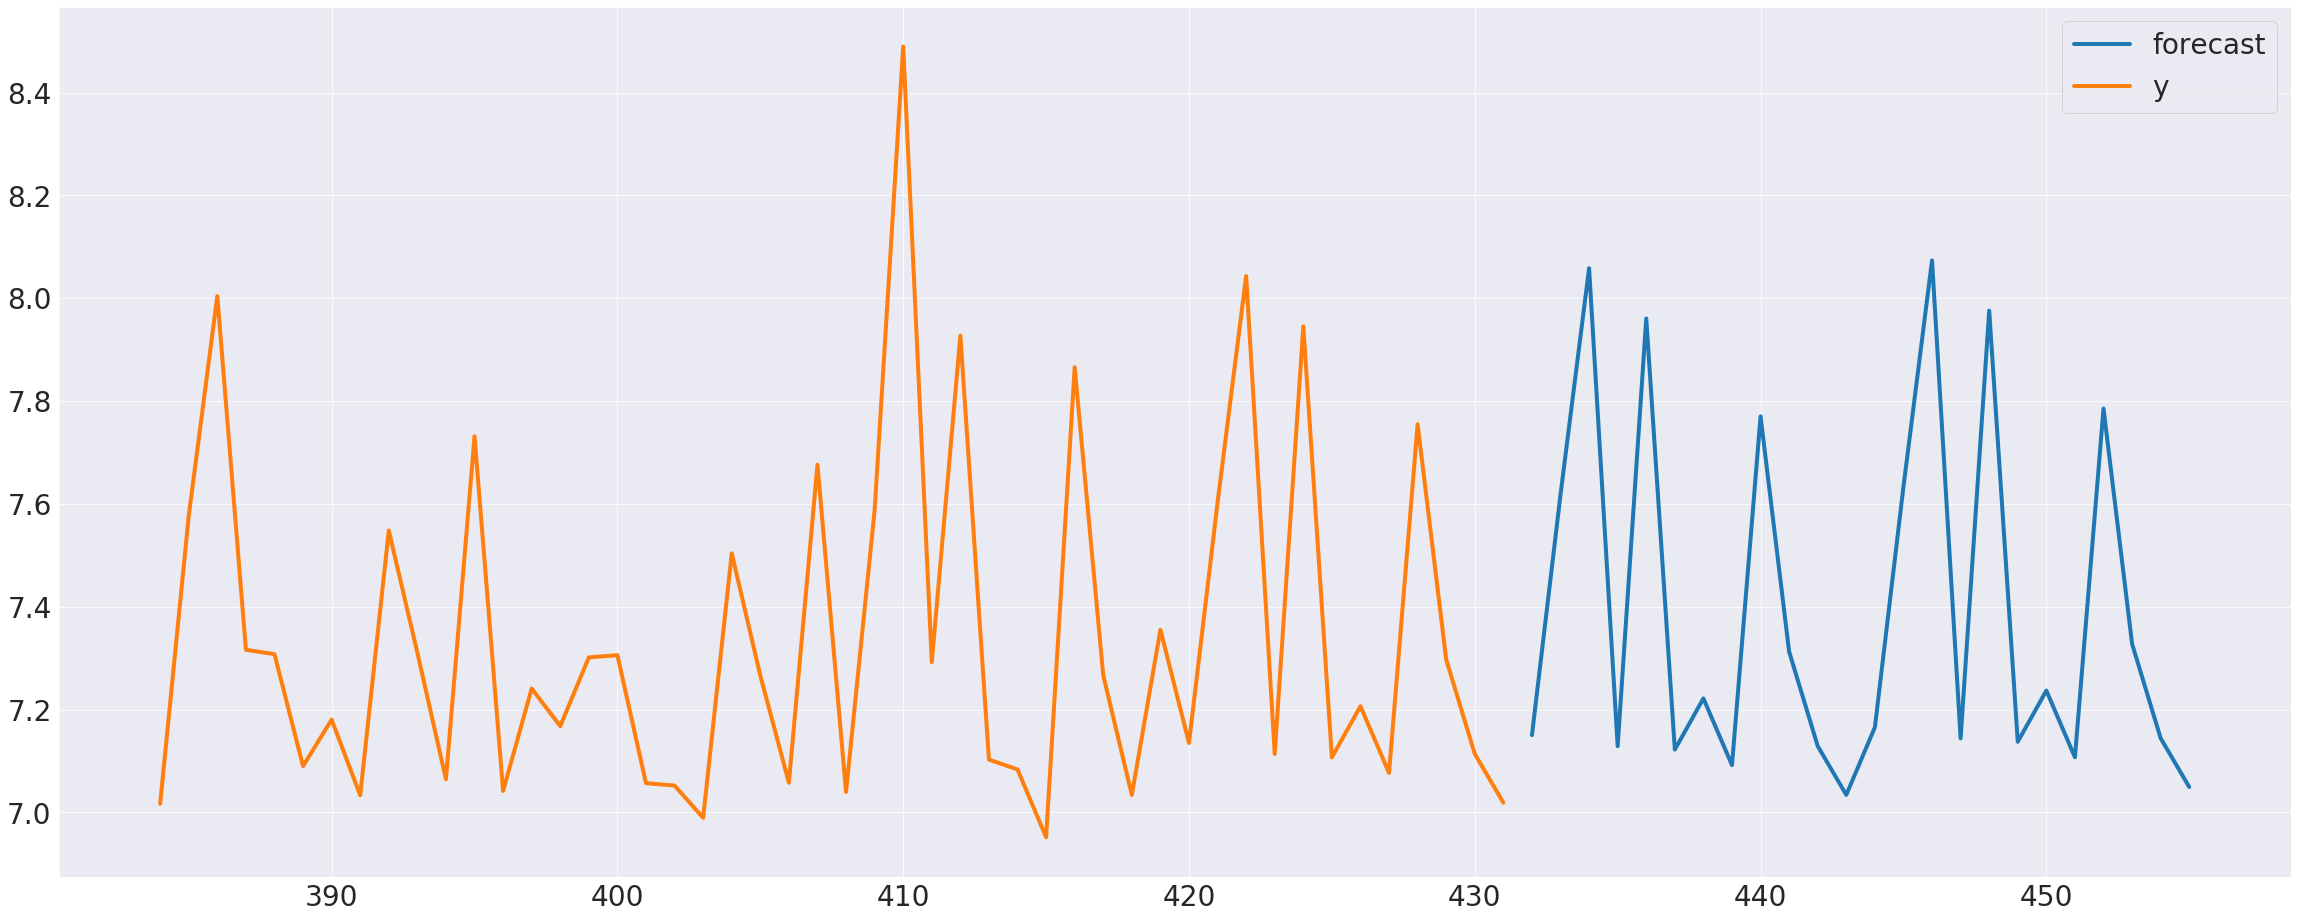

In [18]:
plot_forecast(y, forecast, 72)